# WeatherPy

### Scatter Plots


This file contains the following:

- Clean up of data collected (see WeatherPy_OpenWeatherMap_API_Call file)
- Weather data was collected from OpenWeatherMap.org on September 23, 2019 around 22:44 (PDT)
- Scatter plots that showcase the following relationships:
    - Temperature (F) vs. Latitude
    - Humidity (%) vs. Latitude
    - Cloudiness (%) vs. Latitude
    - Wind Speed (mph) vs. Latitude

In [1]:
# Dependencies and Setup

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from scipy.stats import linregress
import seaborn as sb

# Set seaborn as the style for all graphs

sb.set()

# Read the weather data collected from the API call

cities_weather_data = pd.read_csv("output_data/cities_weather_data.csv", delimiter=",",low_memory=False)

# Display first few rows of data

cities_weather_data.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ushuaia,40,AR,1569303867,81,-54.81,-68.31,44.60,5.82
1,1,kapaa,90,US,1569303701,83,22.08,-159.32,80.60,6.93
2,2,kavaratti,75,IN,1569303892,79,10.57,72.64,84.20,4.70
3,3,rikitea,74,PF,1569303892,72,-23.12,-134.97,69.89,12.80
4,4,weinan,0,CN,1569303893,60,34.50,109.46,78.01,2.24


In [2]:
# Clean up data 
# Drop the "Unnamed: 0" column

cities_weather_data = cities_weather_data.drop("Unnamed: 0", axis=1)

# Display to see if code worked

cities_weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,40,AR,1569303867,81,-54.81,-68.31,44.60,5.82
1,kapaa,90,US,1569303701,83,22.08,-159.32,80.60,6.93
2,kavaratti,75,IN,1569303892,79,10.57,72.64,84.20,4.70
3,rikitea,74,PF,1569303892,72,-23.12,-134.97,69.89,12.80
4,weinan,0,CN,1569303893,60,34.50,109.46,78.01,2.24


In [3]:
# Check the data by doing a count

cities_weather_data.count()

City          526
Cloudiness    526
Country       523
Date          526
Humidity      526
Lat           526
Lng           526
Max Temp      526
Wind Speed    526
dtype: int64

In [4]:
# From above, it looks like not all columns have the same amount of data
# Drop NaN values

cities_weather_data = cities_weather_data.dropna()

# Display first few rows

cities_weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,40,AR,1569303867,81,-54.81,-68.31,44.60,5.82
1,kapaa,90,US,1569303701,83,22.08,-159.32,80.60,6.93
2,kavaratti,75,IN,1569303892,79,10.57,72.64,84.20,4.70
3,rikitea,74,PF,1569303892,72,-23.12,-134.97,69.89,12.80
4,weinan,0,CN,1569303893,60,34.50,109.46,78.01,2.24


In [5]:
# Do another count to check data

cities_weather_data.count()

City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Lat           523
Lng           523
Max Temp      523
Wind Speed    523
dtype: int64

In [6]:
# Make sure that all cities are unique

unique_cities = cities_weather_data.duplicated("City")

# If there are any counts for "True" that means there is a duplicate city name

unique_cities.value_counts()

False    523
dtype: int64

In [7]:
# Output File (CSV)

output_data_file = "output_data/clean_cities_weather_data.csv"

# Save clean data

cities_weather_data.to_csv(output_data_file, index=None)

### Temperature (F) vs. City Latitude Scatter Plot

The following code and scatter plot analyze the max temperatures of 523 random cities around the world. As seen from the scatter plot, as the city latitude gets closer to the equator, the maximum temperature increases. As you get closer to the poles, the temperature decreases.   

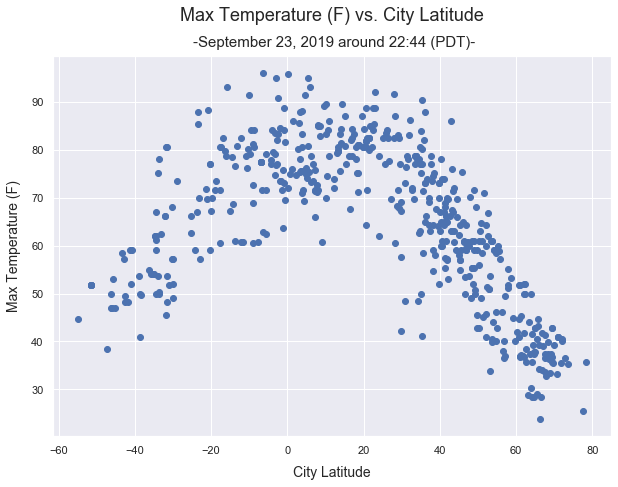

In [8]:
# Set figure size

fig_1 = plt.figure(figsize=(10,7))

# Set the x and y variables to the Latitude and temperature data respectively

x_lat = cities_weather_data["Lat"]
y_temp = cities_weather_data["Max Temp"]

# Plot the data as a scatter plot

plt.scatter(x_lat, y_temp, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("Max Temperature (F) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-",  x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Max Temperature (F)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Save the figure

fig_1.savefig('output_data/Max_Temp_vs_Lat.png')

# Show plot
plt.show()

In [9]:
# Close the plot

plt.close()

### Humidity (%) vs. City Latitude Scatter Plot

The following code and scatter plot analyze the humidity percentage of 523 random cities around the world. Humidity is the amount of water vapor in the air. As seen from the scatter plot, the humidity is quite spread out. However, near the equator, there is less lower humidity levels. Tropical climates tend to be more humid. For the poles, the humidity depends on the season and the time of day.

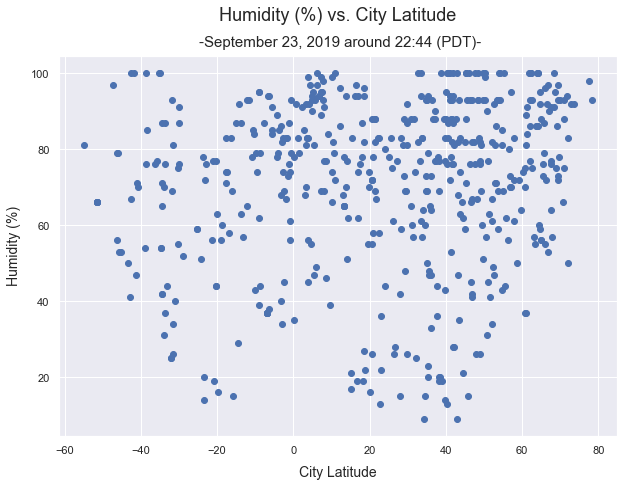

In [10]:
# Set figure size

fig_2 = plt.figure(figsize=(10,7))

# Set y variables to humidity data
# No need to set x variable as the data is the same as the first graph

y_humidity = cities_weather_data["Humidity"]

# Plot the data as a scatter plot

plt.scatter(x_lat, y_humidity, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("Humidity (%) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-",  x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Humidity (%)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Save the figure

fig_2.savefig('output_data/Humidity_vs_Lat.png')


# Show plot
plt.show()

In [11]:
# Close the plot

plt.close()

### Cloudiness (%) vs. City Latitude Scatter Plot

The following code and scatter plot analyze the cloudiness percentage of 523 random cities around the world. As seen from the scatter plot, the cloudiness is distributed widely across all city latitudes. There does not seem to be a strong correlation between where the city is located and the cloudiness percentage.

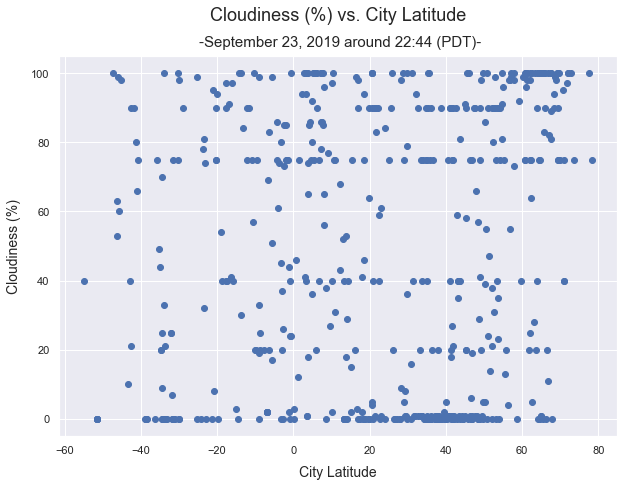

In [12]:
# Set figure size

fig_3 = plt.figure(figsize=(10,7))

# Set y variables to cloudiness data
# No need to set x variable as the data is the same as the first graph

y_cloud = cities_weather_data["Cloudiness"]

# Plot the data as a scatter plot

plt.scatter(x_lat, y_cloud, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("Cloudiness (%) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-",  x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Save the figure

fig_3.savefig('output_data/Cloudiness_vs_Lat.png')

# Show plot
plt.show()

In [13]:
# Close the plot

plt.close()

### Wind Speed (mph) vs. City Latitude Scatter Plot

The following code and scatter plot analyze the wind speed in miles per hour of 523 random cities around the world. As seen from the scatter plot, there seems to be more concentrated lower wind speeds near the equator than the poles. Though the equator has some high wind speeds documented, the cities near the poles have higher wind speeds and less lower wind speeds than the cities near the equator.

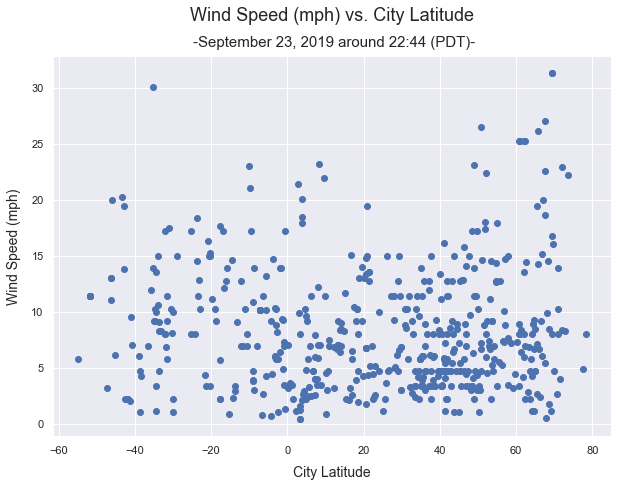

In [14]:
# Set figure size

fig_4 = plt.figure(figsize=(10,7))

# Set y variables to wind speed data
# No need to set x variable as the data is the same as the first graph

y_wind = cities_weather_data["Wind Speed"]

# Plot the data as a scatter plot

plt.scatter(x_lat, y_wind, marker="o")

# Set the title, subtitle, x label, and y label
# For visualization, set the font size and add padding so there is space between the titles/labels and the graph

plt.title("Wind Speed (mph) vs. City Latitude", fontsize=18, pad = 35)
plt.suptitle("-September 23, 2019 around 22:44 (PDT)-",  x=0.515, y=0.92, fontsize = 15)
plt.ylabel("Wind Speed (mph)", fontsize = 14, labelpad=10)
plt.xlabel("City Latitude", fontsize = 14, labelpad=10)

# Add a grid for better visualization

plt.grid(True)

# Save the figure

fig_4.savefig('output_data/Wind_Speed_vs_Lat.png')

# Show plot
plt.show()

In [15]:
# Close the plot

plt.close()